In [1]:
#For this module we are going to use the seaborn library. 
#Seaborn is built on top of the matplotlib library

In [2]:
#importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Getting the data

census_data = pd.read_csv("http://bit.ly/census-data-wkshp") #Loading the data into a dataframe

#to see the top 10 records

census_data.head(10)


,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
#see the shape of the data

census_data.shape

(32561, 14)

In [5]:
#To check if there are missings in the data

census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   gender          32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income_bracket  32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [6]:
census_data.isna().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

<AxesSubplot:>

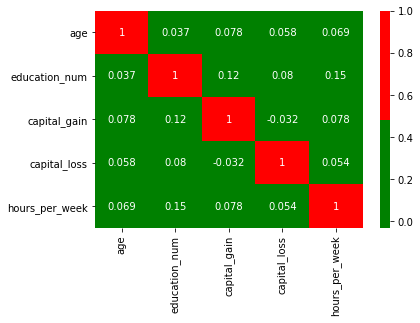

In [16]:
#in order to find the relationship between the 
#numeric cols in the dat, we can use use the heatmap

correl = census_data.corr() #gives the correlation of all the numeric data

#Plot this correl in a heatmap

sns.heatmap(correl, annot = True, cmap=['green','red'])

In [14]:
#There is no relationship we can identify from the heatmap
# Values of the correlation coeff closer to -1/+1 means strong correlation

#Values of the correlation coeff closer to 0 means weak correalation

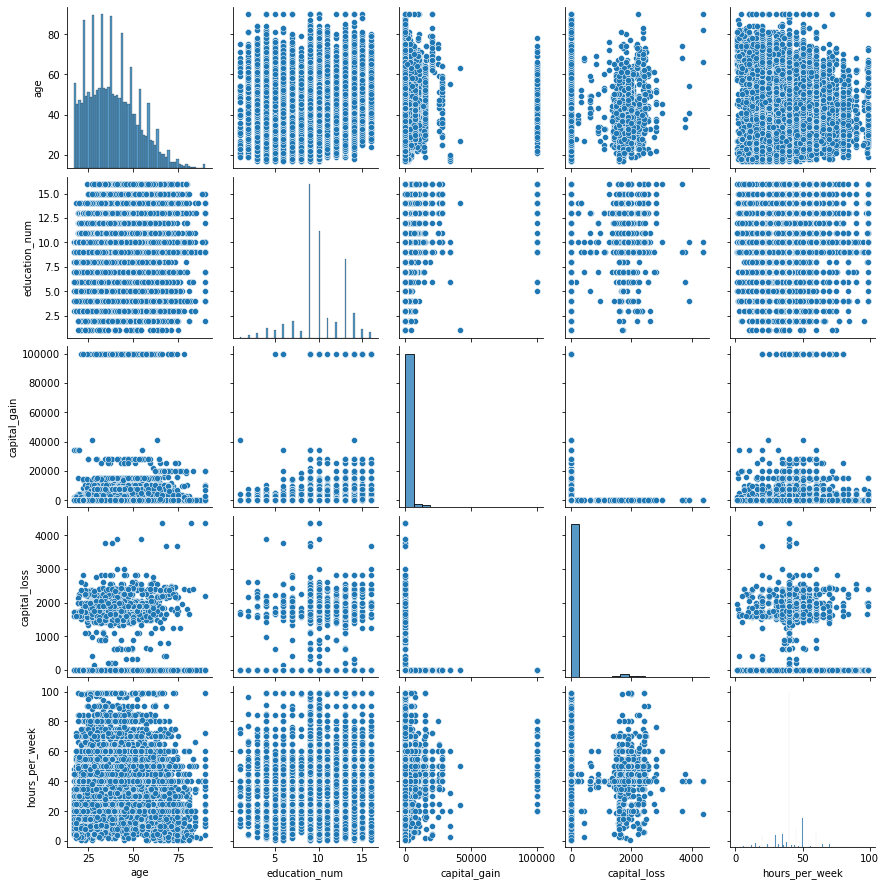

In [17]:
#3. Pairplot analysis

sns.pairplot(census_data)

<AxesSubplot:xlabel='capital_loss', ylabel='capital_gain'>

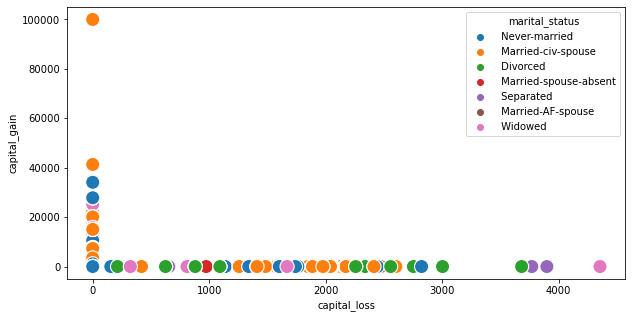

In [22]:
#Relationship between the capital gain and capital loss graph
#Add another dimension of marital_status to colors
plt.figure(figsize= (10,5))
sns.scatterplot(x='capital_loss', y='capital_gain', data=census_data, 
                hue = 'marital_status', s=200)

In [23]:
#1. Divorced, Windowed, Separated individuals are prone to capital loss
#2. There are outliers in both axes
#3. The number of people with captial loss is more than capital gain

<AxesSubplot:xlabel='capital_loss', ylabel='capital_gain'>

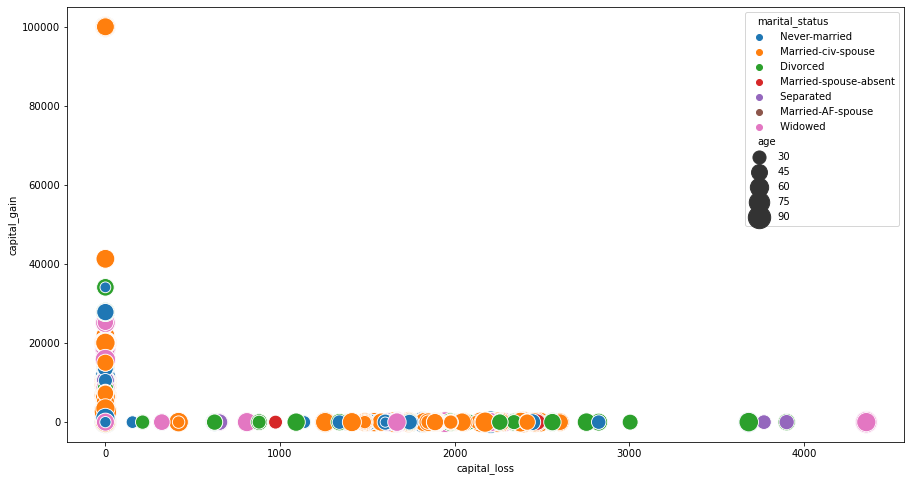

In [25]:
#Let's add another dimension 'age' to Chart 1

plt.figure(figsize = (15,8))

sns.scatterplot(x='capital_loss',y='capital_gain',
                hue='marital_status',size='age',
                sizes = (100, 500), data= census_data)

In [26]:
#1. From the above graph, we can see that the older 
#people are having more capital loss

<AxesSubplot:xlabel='age', ylabel='hours_per_week'>

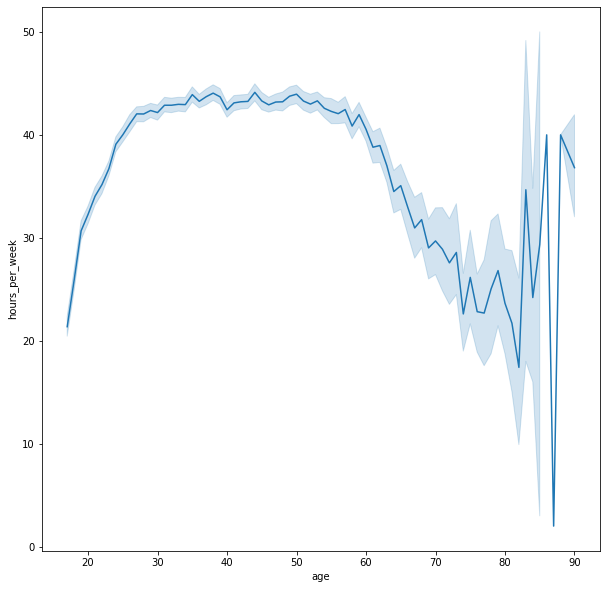

In [27]:
#Chart 3. We will plot age vs hours_worked

plt.figure(figsize = (10,10))

sns.lineplot(x = 'age', y = 'hours_per_week', data=census_data)

In [28]:
#1. At the early age of 20-23 years students are 
#working lesser hours per week.
#2. There has been an exponential increase in 
#the hours worked from age 20 to 30
#3. There is a hoigh fluctuation in the number 
#of hours worked for people above 80 years

<AxesSubplot:xlabel='age', ylabel='marital_status'>

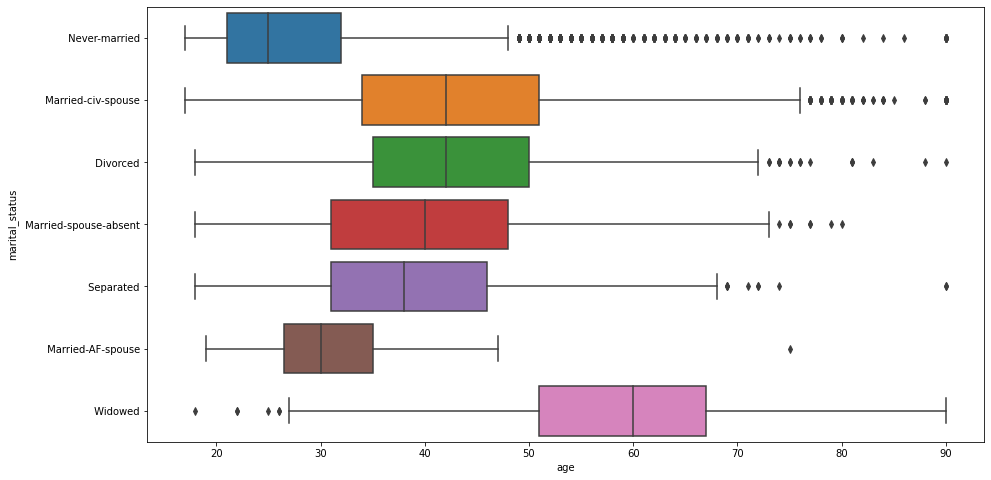

In [29]:
#Let's understand the distribution of age respect 
#to martial_status - Box Plot

plt.figure(figsize=(15,8))
sns.boxplot(x='age', y='marital_status', data= census_data)

<AxesSubplot:xlabel='age', ylabel='marital_status'>

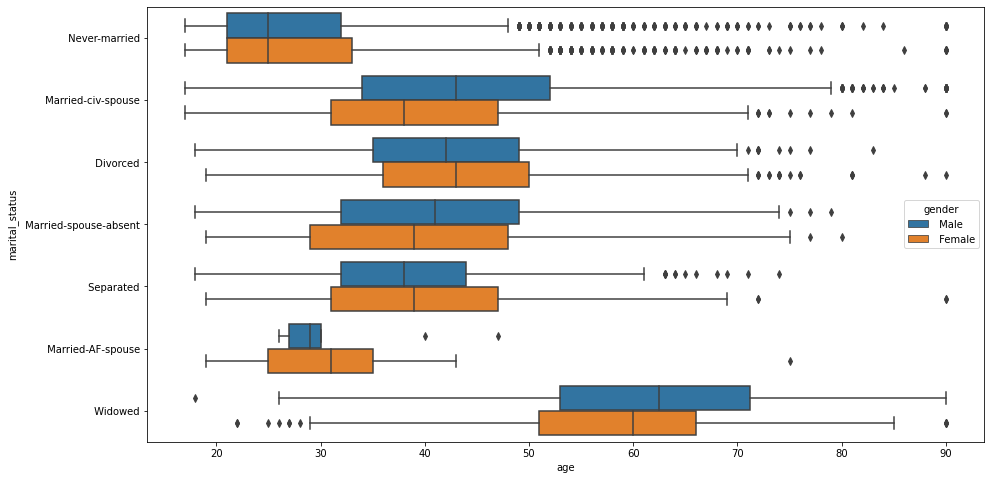

In [31]:
#In the above chart let's add another dimension age to it

plt.figure(figsize = (15,8))
sns.boxplot(x = 'age', y='marital_status', hue='gender', data=census_data)

In [32]:
#civilian (civ) and Airforce (AF)

In [33]:
#1. Females are windowed earlier
#2. The median of Never Married are same for both makes and 
#females but there are outliers in Never-Married

#3. The spread of Married-Airforce-Spouse is small for the 
#males concentrated mostly at the ahe of 28.

#4. The spread of Females being separated is more


<AxesSubplot:xlabel='age', ylabel='income_bracket'>

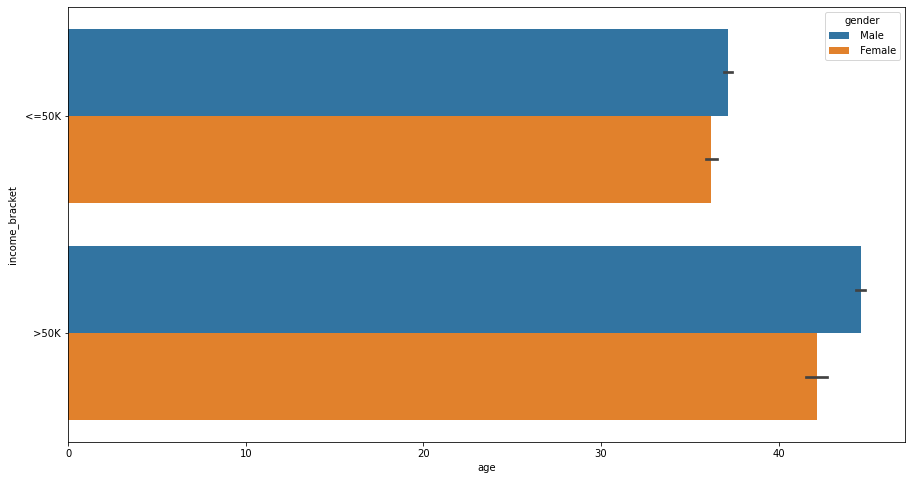

In [40]:
#Let's plot a bargraph the income bracket for age

plt.figure(figsize = (15,8))
sns.barplot(x = 'age', y='income_bracket', hue='gender',data=census_data)

<AxesSubplot:xlabel='age', ylabel='income_bracket'>

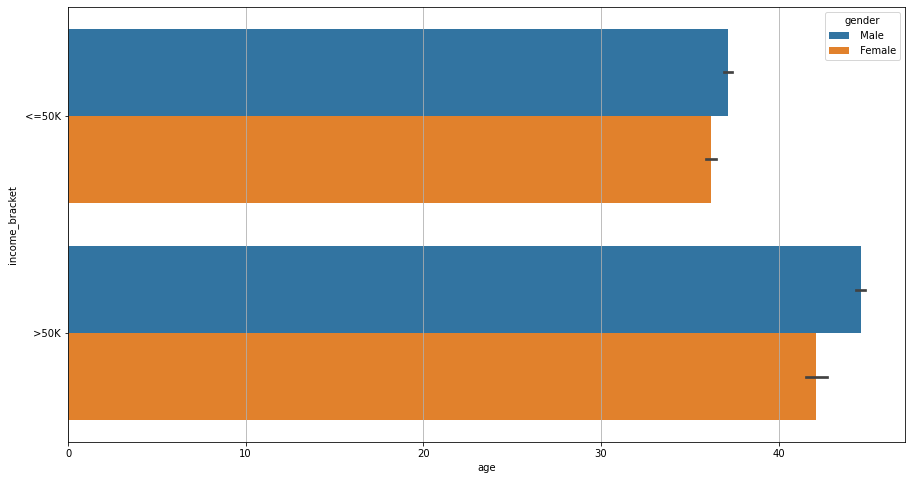

In [46]:
plt.figure(figsize = (15,8))
plt.grid(True)
sns.barplot(x='age', y ='income_bracket', 
            hue = 'gender', data = census_data)


<AxesSubplot:xlabel='income_bracket', ylabel='age'>

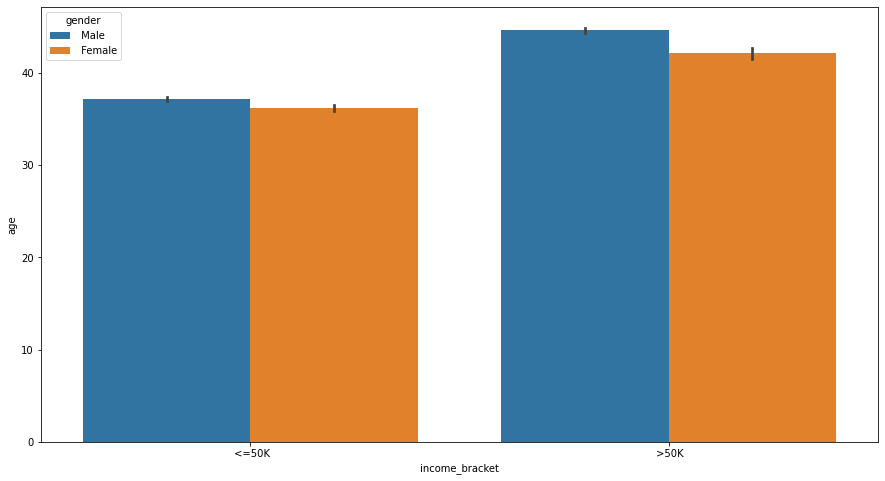

In [45]:
#Let's plot a bargraph the income bracket vs age

plt.figure(figsize = (15,8))
sns.barplot(x='income_bracket', y='age', hue='gender', data= census_data)


In [47]:
#Men are paid slightly higher than the women

<AxesSubplot:xlabel='marital_status', ylabel='count'>

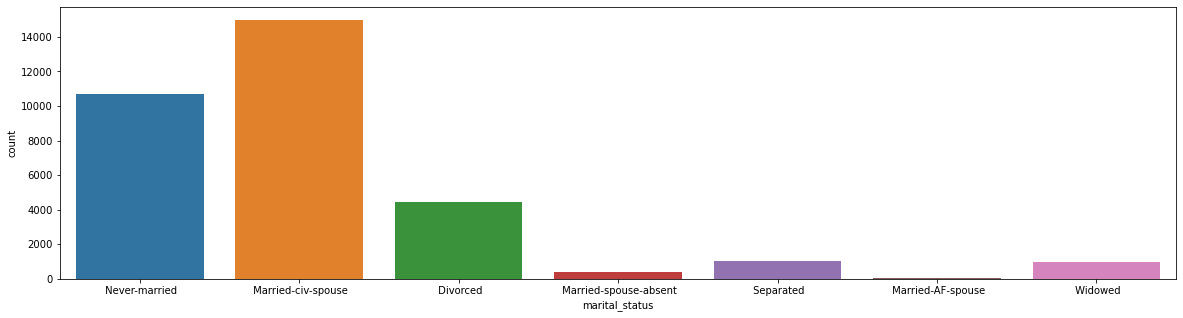

In [49]:
#chart: We want to get the Count of number of people 
#in different categories of marital-status

plt.figure(figsize = (20,5))

sns.countplot(x='marital_status', data=census_data)

In [50]:
#Many people chose not to get married

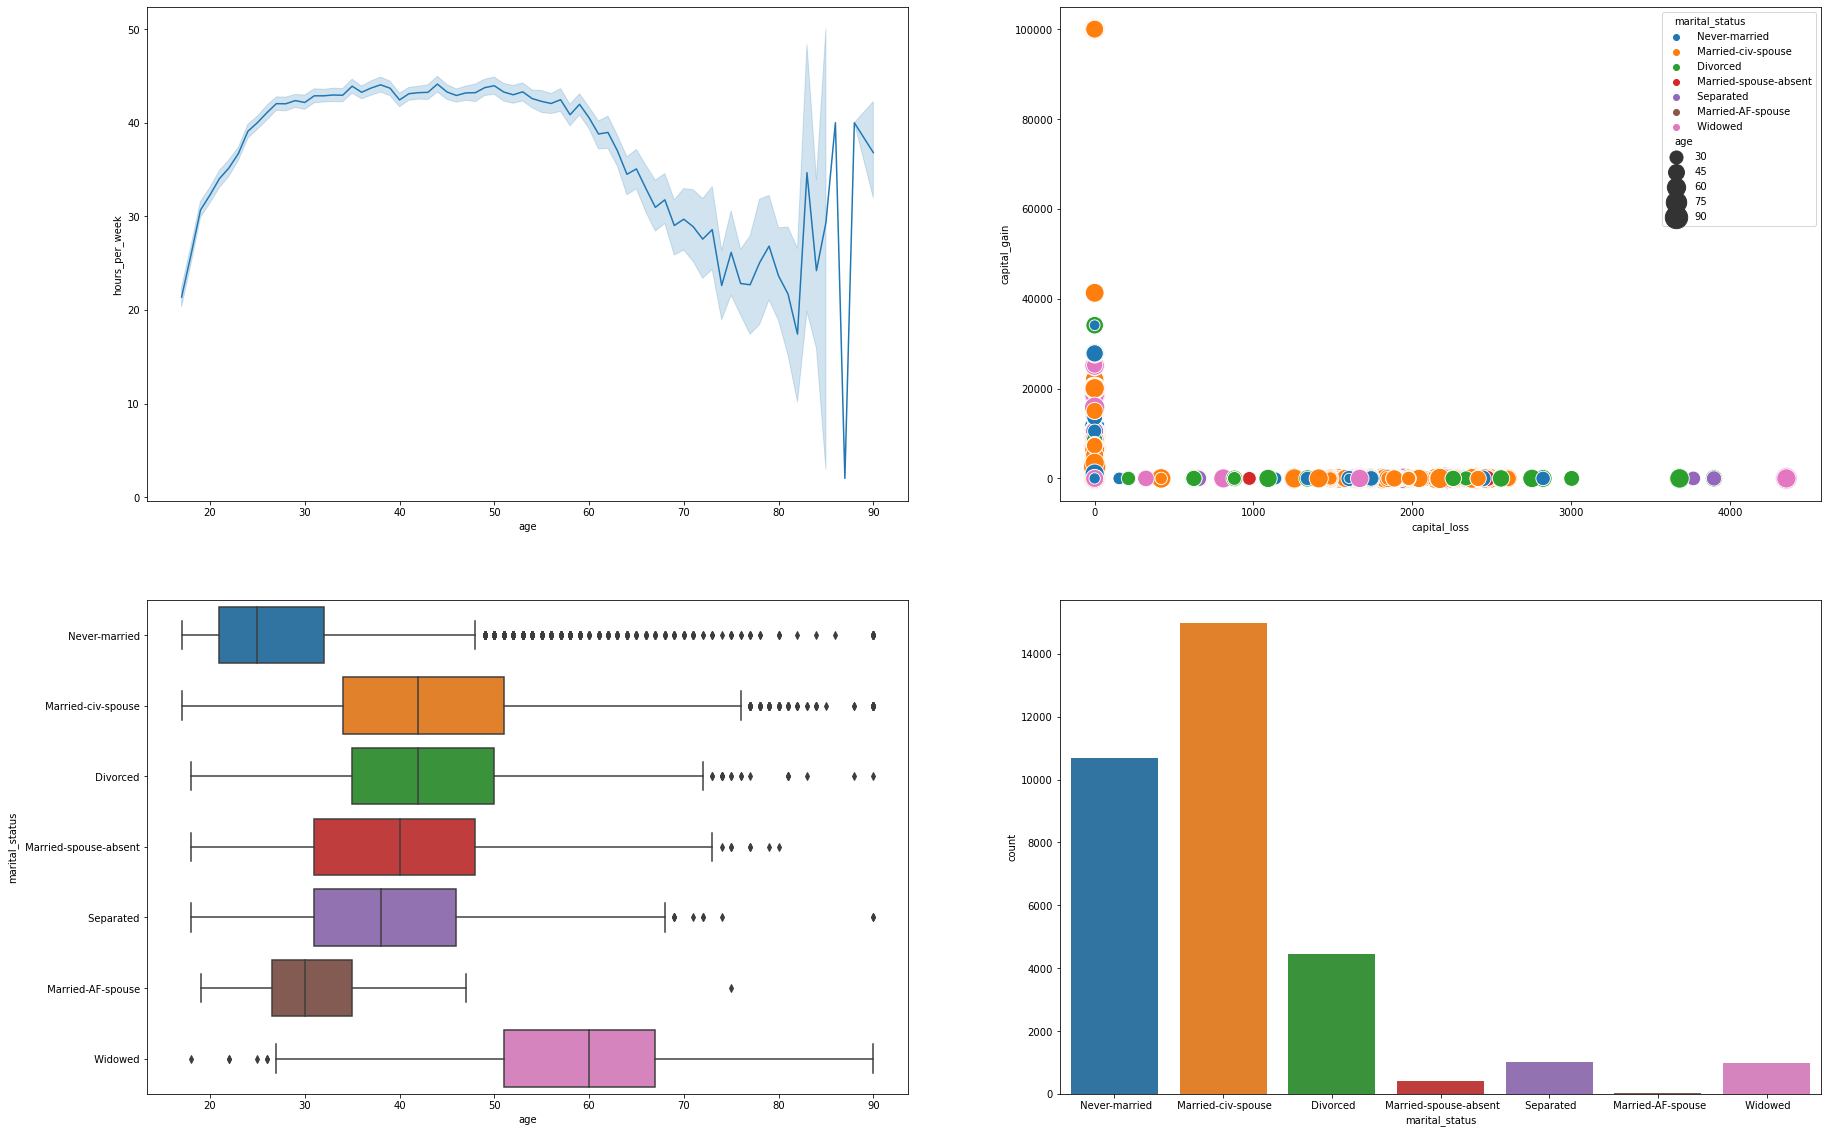

In [53]:
fig = plt.figure(figsize = (30,20))

plt.subplot(2,2,1)
sns.lineplot(x = 'age', y = 'hours_per_week', data=census_data)

plt.subplot(2,2,2)
sns.scatterplot(x='capital_loss',y='capital_gain',
                hue='marital_status',size='age',
                sizes = (100, 500), data= census_data)

plt.subplot(2,2,3)
sns.boxplot(x='age', y='marital_status', data= census_data)

plt.subplot(2,2,4)
sns.countplot(x='marital_status', data=census_data)

plt.show()

In [54]:
#save this dashboard

fig.savefig('dashboard.png')